In [ ]:
ans 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [6]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
# Initialize the one-hot encoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Apply one-hot encoding to categorical columns
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)

# Concatenate the one-hot encoded columns with the original dataset
X = pd.concat([X, X_encoded], axis=1)

# Drop the original categorical columns
X.drop(categorical_cols, axis=1, inplace=True)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [7]:
# Initialize the standard scaler
scaler = StandardScaler()

# Scale the numerical features
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
ans 2

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("Training set - X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Test set - X: {}, y: {}".format(X_test.shape, y_test.shape))


Training set - X: (212, 13), y: (212,)
Test set - X: (91, 13), y: (91,)


In [ ]:
ans 3

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
ans 4

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.81
Precision: 0.84
Recall: 0.82
F1 Score: 0.83


In [ ]:
ans 5

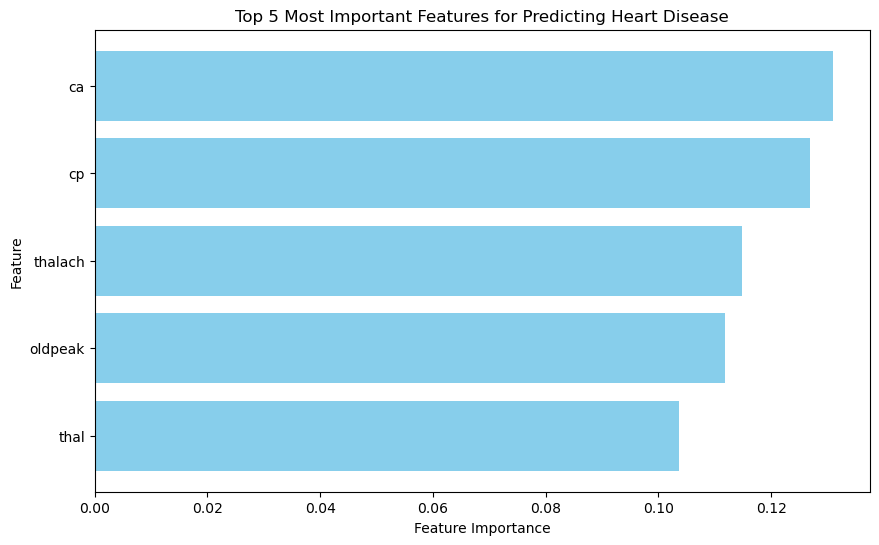

In [11]:
import matplotlib.pyplot as plt

# Get feature importances from the trained random forest classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_5_features = importance_df.head(5)

# Visualize the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features for Predicting Heart Disease')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


In [ ]:
ans 6

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best F1 score achieved
best_f1_score = grid_search.best_score_

# Train the model with the best hyperparameters on the full training set
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
best_y_pred = best_rf_classifier.predict(X_test)
best_f1_test_score = f1_score(y_test, best_y_pred)

# Print the best hyperparameters and performance
print("Best Hyperparameters:", best_params)
print("Best F1 Score (Cross-validation): {:.2f}".format(best_f1_score))
print("F1 Score on Test Set with Best Hyperparameters: {:.2f}".format(best_f1_test_score))


In [ ]:
ans 7

# Report the best hyperparameters and corresponding performance metrics
print("Best Hyperparameters:", best_params)
print("Best F1 Score (Cross-validation): {:.2f}".format(best_f1_score))
print("F1 Score on Test Set with Best Hyperparameters: {:.2f}".format(best_f1_test_score))

# Evaluate the performance of the default model on the test set
default_y_pred = rf_classifier.predict(X_test)
default_f1_test_score = f1_score(y_test, default_y_pred)

# Report the performance of the default model
print("\nPerformance of the Default Model:")
print("F1 Score on Test Set (Default Model): {:.2f}".format(default_f1_test_score))

# Compare the performance of the tuned model with the default model
if best_f1_test_score > default_f1_test_score:
    print("\nThe tuned model outperforms the default model in terms of F1 score.")
elif best_f1_test_score < default_f1_test_score:
    print("\nThe default model outperforms the tuned model in terms of F1 score.")
else:
    print("\nThe tuned model and the default model have the same F1 score.")


In [ ]:
ans 8

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select two of the most important features (you may choose any two)
feature1 = 'age'
feature2 = 'max_heart_rate'

# Extract the data for the selected features
X_subset = X_train[[feature1, feature2]]
X_test_subset = X_test[[feature1, feature2]]

# Fit a random forest classifier with best hyperparameters on the subset of data
subset_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
subset_rf_classifier.fit(X_subset, y_train)

# Create a mesh grid to plot decision boundaries
x_min, x_max = X_subset[feature1].min() - 1, X_subset[feature1].max() + 1
y_min, y_max = X_subset[feature2].min() - 1, X_subset[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = subset_rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot with decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.2)
plt.scatter(X_test_subset[feature1], X_test_subset[feature2], c=y_test, cmap=cmap_points)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Random Forest Decision Boundaries')
plt.show()
